In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '../datasets/diabetes.csv'
DataFrame = pd.read_csv(path)

DataFrame.head()

# 0.08 to 2.42 real range for pedigree

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [4]:
DataFrame.info()
DataFrame.isnull().sum()  # missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
FeatureColumns = DataFrame.drop(columns=['Outcome'])
TargetColumn = DataFrame['Outcome']

XTrain, XTest, YTrain, YTest = train_test_split(
    FeatureColumns, TargetColumn, test_size=0.3, random_state=42
)

# Bagging k maamlaat
NumTrees = 100           # Number of trees in ensemble
MaxSamplesFraction = 0.8 # % of samples per tree

BaggingModel = BaggingClassifier(
    estimator = DecisionTreeClassifier(),  # base learner
    n_estimators = NumTrees,
    max_samples = MaxSamplesFraction,
    n_jobs = -1,
    random_state = 42,
    bootstrap = True
)

BaggingModel.fit(XTrain, YTrain)


YPredTrain = BaggingModel.predict(XTrain)
YPredTest = BaggingModel.predict(XTest)

In [7]:
AccuracyTrain = accuracy_score(YTrain, YPredTrain)
AccuracyTest = accuracy_score(YTest, YPredTest)
print(f"Training Accuracy: {AccuracyTrain:.3f}")
print(f"Test Accuracy: {AccuracyTest:.3f}")

ClassReport = classification_report(YTest, YPredTest)
print("Classification Report:\n", ClassReport)

Training Accuracy: 0.998
Test Accuracy: 0.740
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 117                  34
Actual Positive                  26                  54


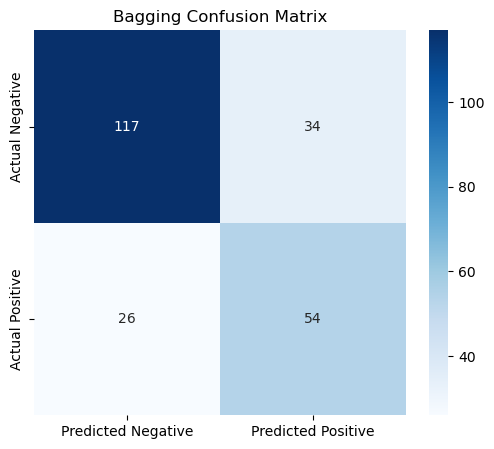

In [8]:
ConfMatrix = confusion_matrix(YTest, YPredTest)
ConfMatrixDF = pd.DataFrame(
    ConfMatrix,
    index=["Actual Negative", "Actual Positive"],
    columns=["Predicted Negative", "Predicted Positive"]
)
print("Confusion Matrix:\n", ConfMatrixDF)


plt.figure(figsize=(6,5))
sns.heatmap(ConfMatrixDF, annot = True, fmt='d', cmap='Blues')
plt.title("Bagging Confusion Matrix")
plt.show()

## Lab Task

PART 1
Using only Blood Pressure, Skin Thickness and PedigreeFunction, apply Logistic Regression, calculate results display performance metrics.

In [9]:
DataFrame.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
from sklearn.linear_model import LogisticRegression

X = DataFrame[['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']]
Y = DataFrame['Outcome']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

LogisticModel = LogisticRegression()
LogisticModel.fit(Xtrain, Ytrain)
YPredLogistic = LogisticModel.predict(Xtest)

report = classification_report(Ytest, YPredLogistic)
print("Logistic Regression Classification Report:\n", report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.79       151
           1       0.67      0.10      0.17        80

    accuracy                           0.67       231
   macro avg       0.67      0.54      0.48       231
weighted avg       0.67      0.67      0.58       231



## Lab Task

PART 2
Using only Blood Pressure, Skin Thickness and PedigreeFunction, apply Bagging Technique use 300 forest, sample fraction 70%, compute and display results.

In [12]:
NumTrees = 300           
MaxSamplesFraction = 0.7 

BaggingModel = BaggingClassifier(
    estimator = DecisionTreeClassifier(),  # base learner
    n_estimators = NumTrees,
    max_samples = MaxSamplesFraction,
    n_jobs = -1,
    random_state = 42,
    bootstrap = True
)

BaggingModel.fit(Xtrain, Ytrain)


YPredTrain = BaggingModel.predict(Xtrain)
YPredTest = BaggingModel.predict(Xtest)

In [13]:
ClassReport = classification_report(Ytest, YPredTest)
print("Bagging Classifier Classification Report:\n", ClassReport)

Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       151
           1       0.44      0.40      0.42        80

    accuracy                           0.61       231
   macro avg       0.57      0.56      0.57       231
weighted avg       0.61      0.61      0.61       231



In [15]:
print("\tClassification report Logistic regression VS Bagging Classifier :-\n")
print("Logistic Regression Classification Report:\n", report)
print("\nBagging Classifier Classification Report:\n", ClassReport)

	Classification report Logistic regression VS Bagging Classifier :-

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.79       151
           1       0.67      0.10      0.17        80

    accuracy                           0.67       231
   macro avg       0.67      0.54      0.48       231
weighted avg       0.67      0.67      0.58       231


Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       151
           1       0.44      0.40      0.42        80

    accuracy                           0.61       231
   macro avg       0.57      0.56      0.57       231
weighted avg       0.61      0.61      0.61       231

